In [1]:
%matplotlib inline
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
from IPython.display import Image as IMG

# Ultrasound Nerve Segmentation

In [2]:
IMG(url='https://kaggle2.blob.core.windows.net/competitions/kaggle/5144/logos/front_page.png')

In [3]:
# https://www.kaggle.com/c/ultrasound-nerve-segmentation
# To reduce stress and limit the adverse side effects of narcotic use for surgery,
# computer vision techniques are being used to guide the placement of special 
# catheters near nerve structures

### Inspecting the Image data

In [4]:
TRAIN_DIR = '../data/train/'
TEST_DIR = '../data/test/'
print(sorted(os.listdir(TRAIN_DIR))[:20])

['10_1.tif', '10_10.tif', '10_100.tif', '10_100_mask.tif', '10_101.tif', '10_101_mask.tif', '10_102.tif', '10_102_mask.tif', '10_103.tif', '10_103_mask.tif', '10_104.tif', '10_104_mask.tif', '10_105.tif', '10_105_mask.tif', '10_106.tif', '10_106_mask.tif', '10_107.tif', '10_107_mask.tif', '10_108.tif', '10_108_mask.tif']


In [5]:
# Here we observe training instances include a .tif image and corresponding .tif image mask

In [6]:
def plot_image_and_mask(img_path, cmap='gray'):
    img = Image.open(img_path)
    msk = Image.open(img_path.replace('.tif', '_mask.tif'))
    plt.imshow(img, cmap=cmap)
    plt.show()
    plt.imshow(msk, cmap=cmap)
    plt.show()
    img_arr = np.array(img.getdata()).reshape(img.height, img.width)
    msk_arr = np.array(msk.getdata()).reshape(msk.height, msk.width)
    plt.imshow(img_arr * msk_arr, cmap='gray') 
    plt.show()
    return

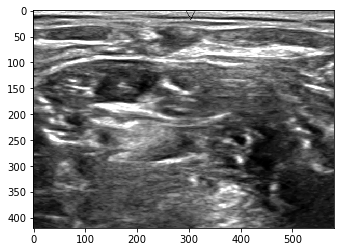

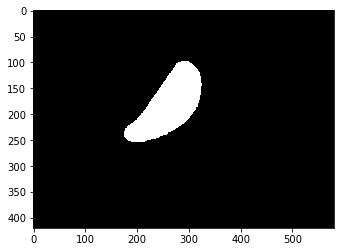

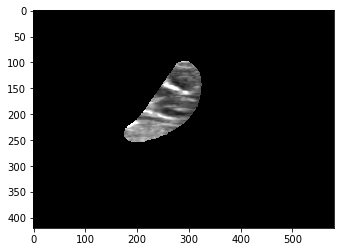

In [7]:
plot_image_and_mask(TRAIN_DIR + '10_100.tif')

In [8]:
# Rendering images as numpy arrays, we can perform element-wise multiplication to
# mask the image to focus on the important pixels in the nerve segmentation task

## Model Evaluation

In [9]:
# Performance is evaluated subject to the Dice coefficient
# https://www.kaggle.com/c/ultrasound-nerve-segmentation#evaluation
# The dice coefficient measures the proportion of overlapping pixel labels
# The leaderboard score follows from the average Dice coefficient over all test images

## Modeling Approach

In [10]:
# Image data generally displays a center-bias where the subject
# is framed near the center of the image.
# Let's view a few examples...

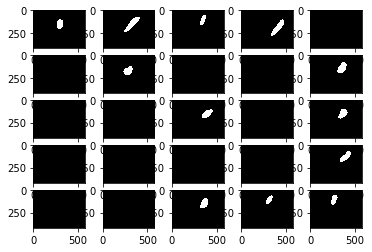

In [11]:
N = 25
f, axarr = plt.subplots(5, 5)
for idx, fl in enumerate(glob(TRAIN_DIR + '*_mask.tif')[:N]):
    ii = idx // 5
    jj = idx % 5
    img = Image.open(fl)
    axarr[ii, jj].imshow(img, cmap='gray')
plt.show()

## The Average Mask

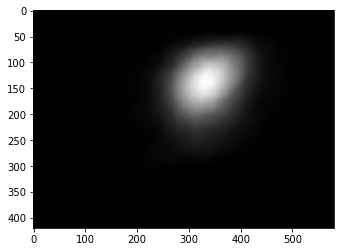

In [12]:
avg_mask = np.zeros_like(np.array(img.getdata()).reshape(img.height, img.width))
for fl in glob(TRAIN_DIR + '*_mask.tif'):
    img = Image.open(fl)
    avg_mask += np.array(img.getdata()).reshape(img.height, img.width)
plt.imshow(avg_mask, cmap='gray')
plt.show()

In [13]:
# By introducing a threshold parameter, we can use a holdout set to 
# effectively dilate the mask. Similarly, we can introduce parameters
# for horizontal/vertical translation for the additional tuning.

## Model Assumptions
* Consistency in center-framing nerve structures
* Image Content less informative

## Future Directions
* Apply ConvNets for additional context
* Experiment with SegNet, CapsNet